In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def h_1(x):
    return x*0+1
def h_2(x):
    return x
def h_3(x):
    return x**2

h = [h_1, h_2, h_3]

#def m(x, beta):
#    return sum([b[0] * h[i](x) for i, b in enumerate(beta)])
def m(mu, h_x):
    return (mu * h_x).sum()

#def sigma_2(x, sigma):
#    return sum([(b[1] * h[i](x))**2 for i, b in enumerate(beta)])
def sigma_2(sigma, h_x):
    return (sigma * h_x).pow(2).sum()

def log_normal_pdf(y, mu, sigma_2):
    return -1/2*(torch.log(2*np.pi*(sigma_2)) + ((y-mu)**2/sigma_2))

def log_lik(y, beta, h_all):
    return sum([log_normal_pdf(y_i, m(beta[0], h_all[i]), sigma_2(beta[1], h_all[i])) for i, y_i in enumerate(y)])


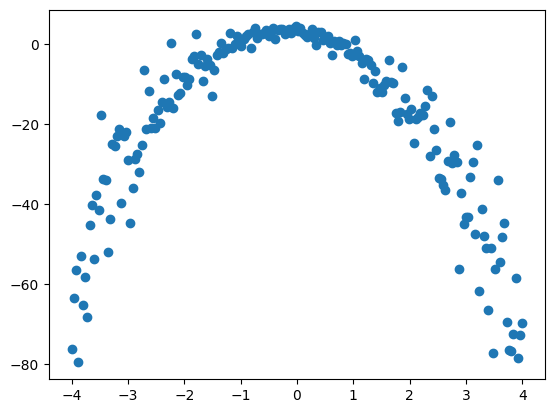

0 tensor([ 0.1000, -0.1000, -0.1000], dtype=torch.float64, requires_grad=True) tensor([1.1000, 1.1000, 1.1000], dtype=torch.float64, requires_grad=True)
10 tensor([ 0.8468, -0.9547, -0.9893], dtype=torch.float64, requires_grad=True) tensor([1.8345, 1.8559, 1.8790], dtype=torch.float64, requires_grad=True)
20 tensor([ 1.3787, -1.4810, -1.6383], dtype=torch.float64, requires_grad=True) tensor([2.1029, 2.1693, 2.2580], dtype=torch.float64, requires_grad=True)
30 tensor([ 1.8104, -1.7529, -2.1128], dtype=torch.float64, requires_grad=True) tensor([2.0979, 2.2216, 2.3987], dtype=torch.float64, requires_grad=True)
40 tensor([ 2.1208, -1.8604, -2.4845], dtype=torch.float64, requires_grad=True) tensor([1.9380, 2.1314, 2.4091], dtype=torch.float64, requires_grad=True)
50 tensor([ 2.4032, -1.8702, -2.8000], dtype=torch.float64, requires_grad=True) tensor([1.6827, 1.9575, 2.3438], dtype=torch.float64, requires_grad=True)
60 tensor([ 2.6363, -1.8294, -3.0866], dtype=torch.float64, requires_grad=Tru

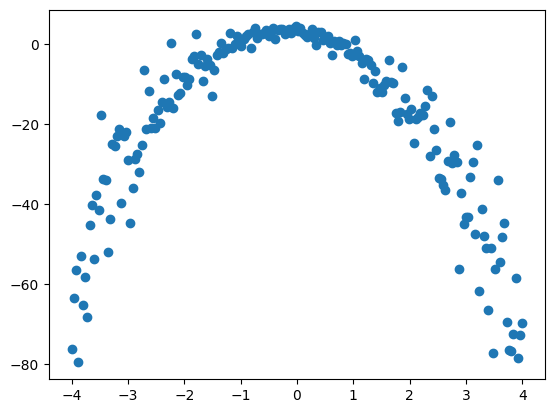

In [12]:

torch.manual_seed(1)
N = 200
x = torch.linspace(-4,4, N)
y = (torch.randn(N)-4) * (x**2) + (-2+torch.randn(N)) * x + (3+torch.randn(N))
#print(x**2)

#Calculate all h(x) in before hand, they are reused each epoch
h_1_data = h_1(x)
h_2_data = h_2(x)
h_3_data = h_3(x)
h_all = torch.transpose(torch.stack([h_1_data, h_2_data, h_3_data], 0), 0, 1)
#print(h_all)

# Create Mu and Sigma for each 
mu = torch.tensor([0., 0., 0.], dtype=float, requires_grad=True)
sigma = torch.tensor([1., 1., 1.], dtype=float, requires_grad=True)
beta = [mu, sigma]

plt.scatter(x, y)
plt.show()

optimizer = torch.optim.Adam(beta,lr=0.1, maximize=True)
for epoch in range(200):
    optimizer.zero_grad()
    loss = log_lik(y, beta, h_all)
    loss.backward()
    optimizer.step()
    if epoch%10==0:
        print(epoch, mu, sigma)
mu = beta[0].detach().numpy()
sigma = beta[1].detach().numpy()
plt.show()
plt.scatter(x,y)

[0.81355442 1.22789489 0.92660843]
15.639306253209352
15.342799755302778
15.04928723235695
14.758769428306621
14.471247366002622
14.186720949626716
13.905188512894332
13.626650792508583
13.351108814398957
13.078562478924775
12.809010128352575
12.542452491447815
12.278890597219764
12.018324341901502
11.760752899967404
11.506174523782928
11.25459271305724
11.00600653700561
10.76041517537225
10.51781688790584
10.27821516022044
10.04160906236896
9.807997780093034
9.577379581877956
9.34975793666686
9.125131915728897
8.903500711666153
8.684862603349082
8.469221838709643
8.256575094329186
8.046923967083163
7.840266345446433
7.636605256474063
7.435938988292676
7.238267542649553
7.043590007488597
6.851908992761994
6.66322280085698
6.477531433804433
6.294834370181623
6.115133042648358
5.938426925005242
5.76471601437661
5.59399902893808
5.426277775622062
5.261551727649242
5.099820510231135
4.941083603785187
4.785343679724214
4.632597330270452
4.482846101742522
4.336089969045146
4.19232859320902
4

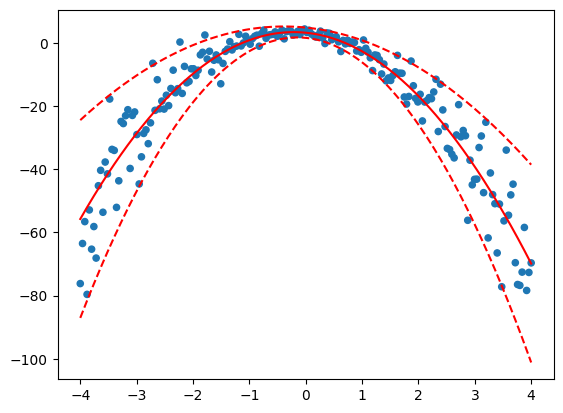

[tensor([ 3.1586, -1.7622, -4.1235], dtype=torch.float64, requires_grad=True), tensor([0.8136, 1.2279, 0.9266], dtype=torch.float64, requires_grad=True)]


In [13]:

y_new = []
sigma_upper = []
sigma_lower = []
generated_data = []
sample_x = []
sample_y = []
print(sigma)
def sigma_2_regular_exp(sigma, h_x):
    return ((sigma * h_x)**2).sum()
for i in range(len(x)):
    h_x = [h_i.item() for h_i in h_all[i]]
    y_new.append(m(mu, h_x))
    s = sigma_2_regular_exp(sigma, h_x)**0.5
    print(s)
    sigma_upper.append(y_new[-1] + 2*s)
    sigma_lower.append(y_new[-1] - 2*s)
    n = 3
    sample = torch.normal(float(y_new[-1]), float(s), size = (1, n))
    for j in range(n):
        sample_x.append(x[i].item())
        sample_y.append(sample[0][j].item())
markersize = 20
plt.scatter(x, y, sizes=[markersize]*len(x))
#plt.scatter(sample_x, sample_y, color=['gray']*len(sample_x), sizes=[markersize]*len(sample_x))
plt.plot(x, y_new, 'r-')
plt.plot(x, sigma_upper, 'r--')
plt.plot(x, sigma_lower, 'r--')
plt.show()
print(beta)

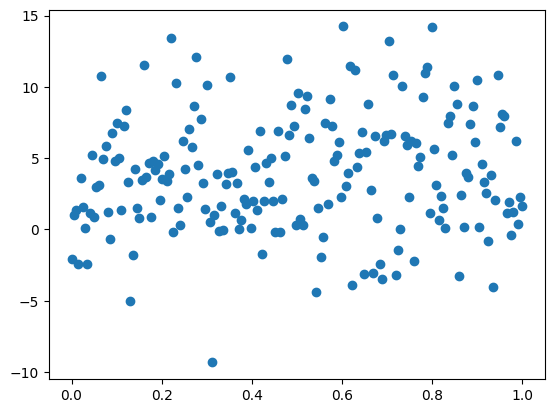

0 tensor([0.1000], dtype=torch.float64, requires_grad=True) tensor([1.1000], dtype=torch.float64, requires_grad=True)
10 tensor([0.8727], dtype=torch.float64, requires_grad=True) tensor([1.8009], dtype=torch.float64, requires_grad=True)
20 tensor([1.3022], dtype=torch.float64, requires_grad=True) tensor([2.1088], dtype=torch.float64, requires_grad=True)
30 tensor([1.5542], dtype=torch.float64, requires_grad=True) tensor([2.2370], dtype=torch.float64, requires_grad=True)
40 tensor([1.7220], dtype=torch.float64, requires_grad=True) tensor([2.2827], dtype=torch.float64, requires_grad=True)
50 tensor([1.8529], dtype=torch.float64, requires_grad=True) tensor([2.2905], dtype=torch.float64, requires_grad=True)
60 tensor([1.9701], dtype=torch.float64, requires_grad=True) tensor([2.2808], dtype=torch.float64, requires_grad=True)
70 tensor([2.0840], dtype=torch.float64, requires_grad=True) tensor([2.2632], dtype=torch.float64, requires_grad=True)
80 tensor([2.1993], dtype=torch.float64, requires

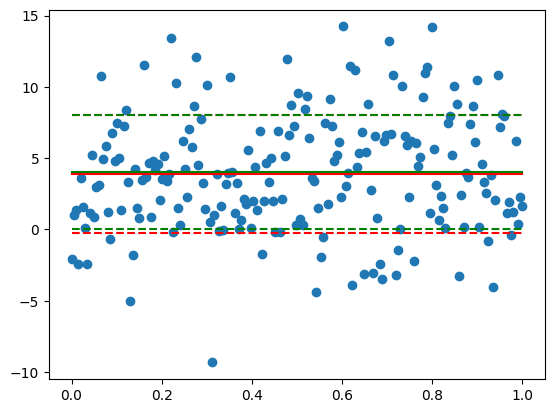

[tensor([3.9013], dtype=torch.float64, requires_grad=True), tensor([2.0289], dtype=torch.float64, requires_grad=True)]


In [19]:

torch.manual_seed(1)
N = 200
x = torch.linspace(-4,4, N)
y = (torch.randn(N)-4) * x**2 + (-2+torch.randn(N)) * x + (3+torch.randn(N))

#Calculate all h(x) in before hand, they are reused each epoch
h_1_data = h_1(x)
h_2_data = h_2(x)
h_3_data = h_3(x)
h_all = torch.transpose(torch.stack([h_1_data, h_2_data, h_3_data], 0), 0, 1)

# Create Mu and Sigma for each 
mu = torch.tensor([0., 0., 0.], dtype=float, requires_grad=True)
sigma = torch.tensor([1., 1., 1.], dtype=float, requires_grad=True)
beta = [mu, sigma]

plt.scatter(x, y)
plt.show()

optimizer = torch.optim.Adam(beta,lr=0.1, maximize=True)
for epoch in range(200):
    optimizer.zero_grad()
    loss = log_lik(x, y, beta, h_all)
    loss.backward()
    optimizer.step()
    if epoch%10==0:
        print(epoch, mu, sigma)
mu = beta[0].detach().numpy()
sigma = beta[1].detach().numpy()
plt.show()
plt.scatter(x,y)
y = []
sigma_upper = []
sigma_lower = []
def sigma_2_regular_exp(sigma, h_x):
    return ((sigma * h_x)**2).sum()
for i in range(len(x)):
    h_x = [h_i.item() for h_i in h_all[i]]
    y.append(m(mu, h_x))
    sigma_upper.append(y[-1] + sigma_2_regular_exp(sigma, h_x))
    sigma_lower.append(y[-1] - sigma_2_regular_exp(sigma, h_x))
plt.plot(x, y, 'r-')
plt.plot(x, sigma_upper, 'r--')
plt.plot(x, sigma_lower, 'r--')
# plt.plot(x, m(x)-*sigma[0], 'r--')
# plt.plot(x, mu[2]*x**2+mu[1]*x+mu[0]+2*sigma[0], 'r--')
#plt.plot(x, (aMax-aVar**0.5)*x**2+bMax*x+cMax, 'r--')
#plt.plot(x, (aMax+aVar**0.5)*x**2+bMax*x+cMax, 'r--')
plt.show()
print(beta)